# **Projet** 

"Les maladies cardiaques, également appelées maladies cardiovasculaires, constituent un terme générique désignant les affections et troubles qui touchent le cœur et le système circulatoire. Elles représentent l’une des principales causes d’invalidité dans le monde. Comme le cœur est l’un des organes les plus vitaux du corps humain, ses maladies ont également un impact sur d’autres organes et parties du corps.
Il existe plusieurs types et formes de maladies cardiaques. Les plus courantes provoquent un rétrécissement ou une obstruction des artères coronaires, un dysfonctionnement des valves cardiaques, une dilatation du cœur, ainsi que d’autres anomalies pouvant conduire à une **insuffisance cardiaque** ou à une **crise cardiaque**.*"

In [36]:
import pandas as pd

# Chargement du jeu de données
df = pd.read_csv("heart.csv")

# Vérification rapide
print(df.shape)


(303, 14)


In [37]:
df.head()

,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.dtypes

âge                            int64
sexe                           int64
type_douleur_poitrine          int64
tension_repos                  int64
cholestérol                    int64
glycémie_jeune                 int64
électrocardiogramme_repos      int64
fréquence_cardiaque_max        int64
angine_exercice                int64
dépression_ST_exercice       float64
pente_ST                       int64
vaisseaux_colorés              int64
thal                           int64
maladie_cœur                   int64
dtype: object

1.1 Dictionnaire des données <a class="anchor" id="1.1"></a>

âge : âge du patient (en années)

sexe : sexe du patient

1 = homme

0 = femme

type_douleur_poitrine : type de douleur thoracique

Valeur 0 : angine typique

Valeur 1 : angine atypique

Valeur 2 : douleur non angineuse

Valeur 3 : asymptomatique

tension_repos : tension artérielle au repos (en mm Hg à l’admission à l’hôpital)

cholestérol : taux de cholestérol sérique (en mg/dl)

glycémie_jeune : glycémie à jeun (> 120 mg/dl)

1 = vrai

0 = faux

électrocardiogramme_repos : résultats de l’électrocardiogramme au repos

Valeur 0 : normal

Valeur 1 : anomalies de l’onde ST-T (inversion de l’onde T et/ou élévation ou dépression du segment ST > 0,05 mV)

Valeur 2 : hypertrophie ventriculaire gauche probable ou certaine (critères d’Estes)

fréquence_cardiaque_max : fréquence cardiaque maximale atteinte à l’effort

angine_exercice : angine de poitrine provoquée par l’effort

1 = oui

0 = non

dépression_ST_exercice : dépression du segment ST induite par l’effort par rapport au repos

pente_ST : pente du segment ST lors de l’effort maximal

Valeur 0 : montante

Valeur 1 : plate

Valeur 2 : descendante

vaisseaux_colorés : nombre de vaisseaux majeurs (0 à 3) colorés par fluoroscopie

thal : résultat du test au thallium

0 = erreur (dans le jeu de données original, 0 correspond à des valeurs manquantes)

1 = défaut fixe

2 = normal

3 = défaut réversible

maladie_cœur (étiquette cible) : présence d’une maladie cardiaque

0 = pas de maladie

1 = maladie détectée

Exportation des bibliothèques

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modèles
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Exploration du jeu de données

In [40]:
# Chargement
df = pd.read_csv("heart.csv")

# Aperçu général
print(df.shape)
df.head()


(303, 14)


,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Analyse exploratoire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   âge                        303 non-null    int64  
 1   sexe                       303 non-null    int64  
 2   type_douleur_poitrine      303 non-null    int64  
 3   tension_repos              303 non-null    int64  
 4   cholestérol                303 non-null    int64  
 5   glycémie_jeune             303 non-null    int64  
 6   électrocardiogramme_repos  303 non-null    int64  
 7   fréquence_cardiaque_max    303 non-null    int64  
 8   angine_exercice            303 non-null    int64  
 9   dépression_ST_exercice     303 non-null    float64
 10  pente_ST                   303 non-null    int64  
 11  vaisseaux_colorés          303 non-null    int64  
 12  thal                       303 non-null    int64  
 13  maladie_cœur               303 non-null    int64  

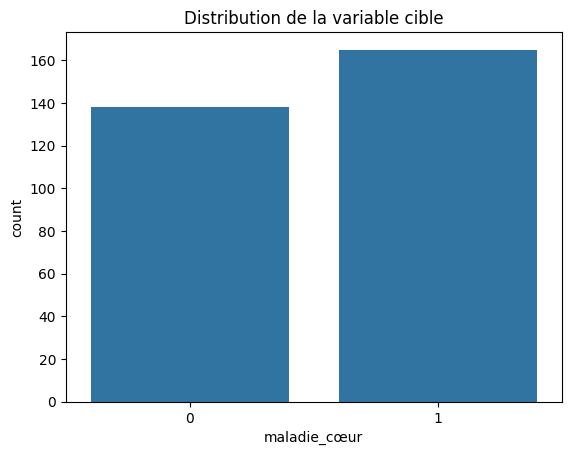

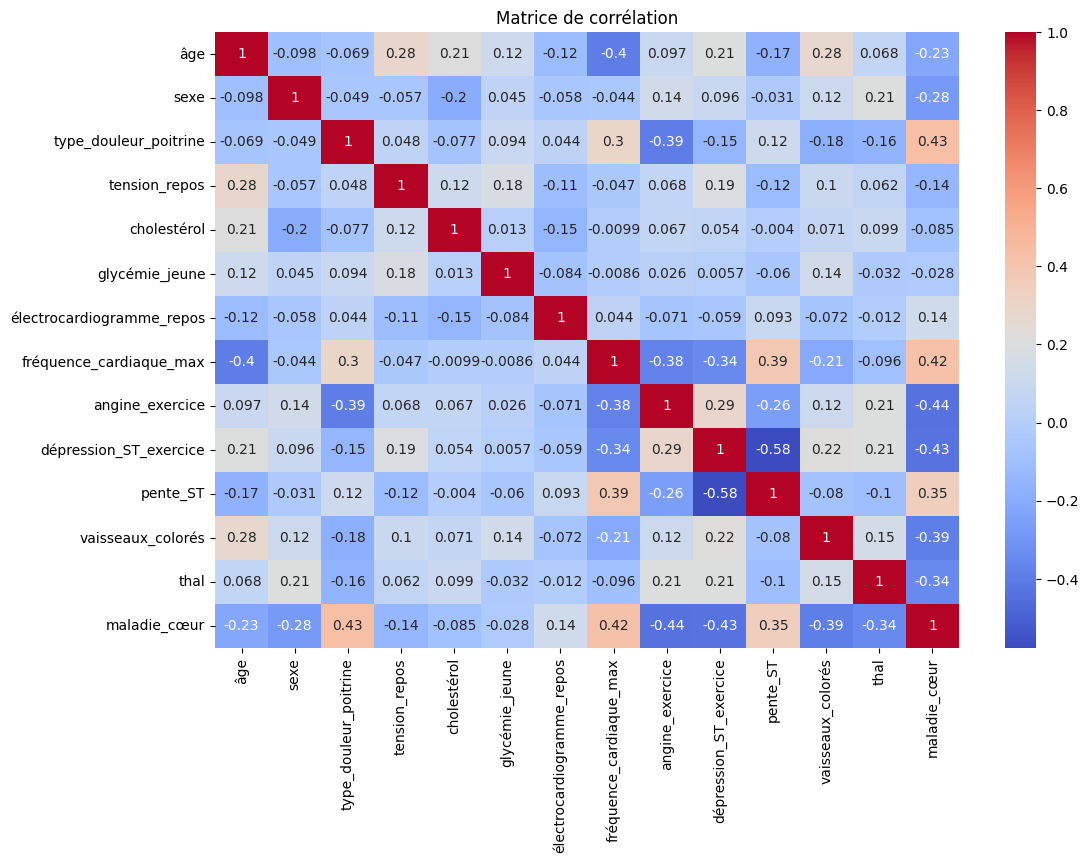

In [41]:
df.info()
df.describe()

# Vérification des valeurs manquantes
print(df.isnull().sum())

# Visualisation de la distribution de la cible
sns.countplot(x='maladie_cœur', data=df)
plt.title("Distribution de la variable cible")
plt.show()

# Corrélation entre variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


Interprétation des données

Le dataset contient 303 patients et 14 colonnes, ce résultat est cohérent.
La majorité des données sont entières (13) sauf "depression_ST_exercice" qui est un nombre réel.

Selon le sujet, les valeurs 4 dans vaisseaux_colorés sont fausses et les 0 dans thal sont manquantes.
Il n'y a officielement aucune valeur manquante mais le set de données peut contenir des valeurs aberrantes qui seront traiter pendant le nettoyage.
 

In [42]:
df.describe()

,âge,sexe,type_douleur_poitrine,tension_repos,cholestérol,glycémie_jeune,électrocardiogramme_repos,fréquence_cardiaque_max,angine_exercice,dépression_ST_exercice,pente_ST,vaisseaux_colorés,thal,maladie_cœur
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Grâce à ces données, on voit qu'il y a effectivement des valeurs aberrantes, le max de "vaisseaux_colorés" est 4 et le min de "thal" est 0. On va maintenant chercher combien de valeurs sont concernées.

Valeurs pour 'vaisseaux_colorés':
vaisseaux_colorés
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

Valeurs pour 'thal':
thal
0      2
1     18
2    166
3    117
Name: count, dtype: int64


C:\Users\lstephanus01\AppData\Local\Temp\ipykernel_8288\3293936939.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts_vaisseaux.index, y=val_counts_vaisseaux.values, ax=axes[0], palette="Set2")
C:\Users\lstephanus01\AppData\Local\Temp\ipykernel_8288\3293936939.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_counts_thal.index, y=val_counts_thal.values, ax=axes[1], palette="Set3")


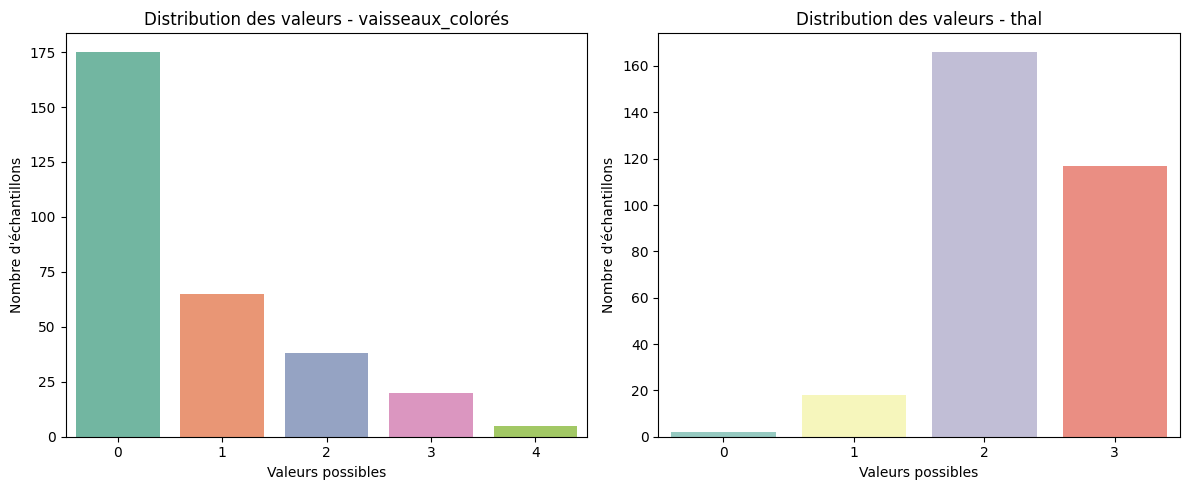

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les valeurs uniques pour chaque variable
val_counts_vaisseaux = df['vaisseaux_colorés'].value_counts().sort_index()
val_counts_thal = df['thal'].value_counts().sort_index()

# Afficher les tableaux de comptage
print("Valeurs pour 'vaisseaux_colorés':")
print(val_counts_vaisseaux)
print("\nValeurs pour 'thal':")
print(val_counts_thal)

# Visualisation avec des graphiques à barres
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# "vaisseaux_colorés"
sns.barplot(x=val_counts_vaisseaux.index, y=val_counts_vaisseaux.values, ax=axes[0], palette="Set2")
axes[0].set_title("Distribution des valeurs - vaisseaux_colorés")
axes[0].set_xlabel("Valeurs possibles")
axes[0].set_ylabel("Nombre d'échantillons")

# "thal"
sns.barplot(x=val_counts_thal.index, y=val_counts_thal.values, ax=axes[1], palette="Set3")
axes[1].set_title("Distribution des valeurs - thal")
axes[1].set_xlabel("Valeurs possibles")
axes[1].set_ylabel("Nombre d'échantillons")

plt.tight_layout()
plt.show()




On voit qu'il y a 5 valeurs aberrantes qui concerne une erreur de "vaisseaux_colorés" et 2 valeurs manquantes dans "thal". 
Nous allons desormais voir où se situe ces valeurs.



In [44]:
# Lignes où "vaisseaux_colorés" = 4 (valeurs aberrantes)
aberrantes_vaisseaux = df[df['vaisseaux_colorés'] == 4]
print(" Lignes avec vaisseaux_colorés = 4 :")
print(aberrantes_vaisseaux)


 Lignes avec vaisseaux_colorés = 4 :
     âge  sexe  type_douleur_poitrine  tension_repos  cholestérol  \
92    52     1                      2            138          223   
158   58     1                      1            125          220   
163   38     1                      2            138          175   
164   38     1                      2            138          175   
251   43     1                      0            132          247   

     glycémie_jeune  électrocardiogramme_repos  fréquence_cardiaque_max  \
92                0                          1                      169   
158               0                          1                      144   
163               0                          1                      173   
164               0                          1                      173   
251               1                          0                      143   

     angine_exercice  dépression_ST_exercice  pente_ST  vaisseaux_colorés  \
92                 0

Les lignes concernées par des valeurs fausses sont les lignes : 92, 158, 163, 164 et 251. 
(Attention il faut ajouter +2 aux lignes pour avoir les lignes correspondantes sur Excel car la numérotation est différente, sur Excel les lignes commence par 1 et correspond à la description, alors qu'en informatique ça commence par 0 avec directement les valeurs. )

In [45]:
# Lignes où "thal" = 0 (valeurs manquantes déguisées)
aberrantes_thal = df[df['thal'] == 0]
print(" Lignes avec thal = 0 :")
print(aberrantes_thal)

 Lignes avec thal = 0 :
     âge  sexe  type_douleur_poitrine  tension_repos  cholestérol  \
48    53     0                      2            128          216   
281   52     1                      0            128          204   

     glycémie_jeune  électrocardiogramme_repos  fréquence_cardiaque_max  \
48                0                          0                      115   
281               1                          1                      156   

     angine_exercice  dépression_ST_exercice  pente_ST  vaisseaux_colorés  \
48                 0                     0.0         2                  0   
281                1                     1.0         1                  0   

     thal  maladie_cœur  
48      0             1  
281     0             0  


Les lignes concernées par des valeurs manquantes sont les lignes : 48 et 281.

Nous faisons le choix de ne pas supprimer les lignes avec des valeurs abberantes, en effet cela nous ferait perdre des informations et pourrait également déséquilibrer les classes entre les malades et les non malades par exemple. Nous faisons donc le choix de remplacer ces valeurs par les valeurs médianes, cela permet de ne perdre aucune valeur et il s'agit d'une méthode robuste car elle est insensible aux valeurs extrêmes. 

Dans le code suivant nous allons remplacer les valeurs abberantes par la médiane et comparer la répartition des valeurs avant et après nettoyage.

C:\Users\lstephanus01\AppData\Local\Temp\ipykernel_8288\83554643.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=vaisseaux_avant, ax=axes[0,0], palette="Set2")
C:\Users\lstephanus01\AppData\Local\Temp\ipykernel_8288\83554643.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=vaisseaux_apres, ax=axes[0,1], palette="Set2")
C:\Users\lstephanus01\AppData\Local\Temp\ipykernel_8288\83554643.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=thal_avant, ax=axes[1,0], palette="Set3")
C:\Users\lstephanus01\AppData\Local\Temp\ipyk

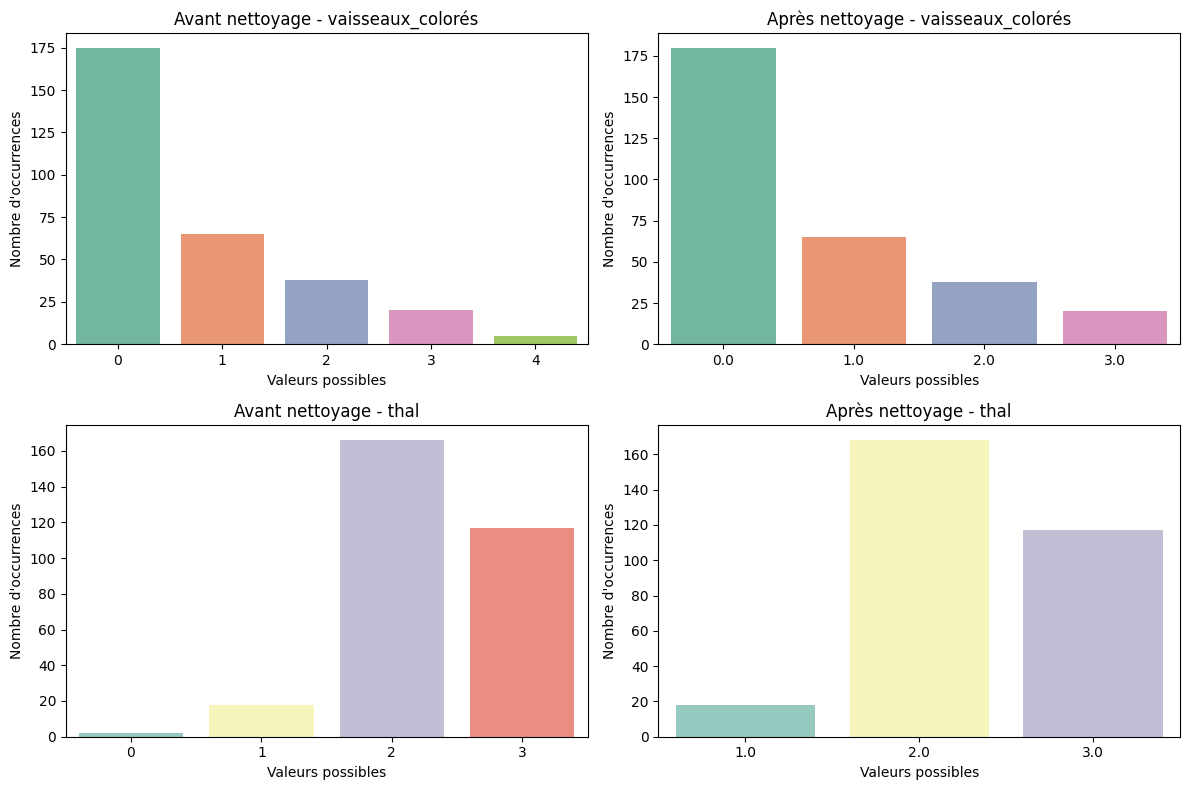

In [ ]:
# Sauvegarder les valeurs avant nettoyage
vaisseaux_avant = df['vaisseaux_colorés'].copy()
thal_avant = df['thal'].copy()

# Nettoyage : remplacer les valeurs aberrantes
df.loc[df['vaisseaux_colorés'] == 4, 'vaisseaux_colorés'] = np.nan
df.loc[df['thal'] == 0, 'thal'] = np.nan

# Imputation par la médiane
df.fillna(df.median(numeric_only=True), inplace=True)

# Récupérer les valeurs après nettoyage
vaisseaux_apres = df['vaisseaux_colorés']
thal_apres = df['thal']

# Création de graphiques comparatifs
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# VAISSEAUX_COLORÉS
sns.countplot(x=vaisseaux_avant, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Avant nettoyage - vaisseaux_colorés")

sns.countplot(x=vaisseaux_apres, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Après nettoyage - vaisseaux_colorés")

# THAL
sns.countplot(x=thal_avant, ax=axes[1,0], palette="Set3")
axes[1,0].set_title("Avant nettoyage - thal")

sns.countplot(x=thal_apres, ax=axes[1,1], palette="Set3")
axes[1,1].set_title("Après nettoyage - thal")

# Ajustement de la mise en page
for ax in axes.flat:
    ax.set_xlabel("Valeurs possibles")
    ax.set_ylabel("Nombre d'occurrences")

plt.tight_layout()
plt.show()

Nous avons nettoyer les valeurs abberantes et également vérifier l'impact sur la distribution des données pour s'assurer que le traitement ne déforme pas la représentation. On peut dire que le nettoyage a fonctionné et que la distrubtion reste similaire.